### Step 1: Importing the Relevant Libraries

In [776]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from  sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
import keras
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from sklearn.ensemble import BaggingClassifier
from collections import Counter
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.utils import class_weight
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb

### Step 2: Data Inspection

In [777]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [778]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [779]:
train.drop('ID',axis=1,inplace=True)

In [780]:
train['Region_Code'].value_counts()

1       96
5       75
2       73
6       73
4       73
        ..
5548     1
5671     1
5639     1
5686     1
5524     1
Name: Region_Code, Length: 5316, dtype: int64

In [781]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         39191 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  object 
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.0+ MB


In [782]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [783]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [784]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 7


In [785]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 6
Numerical Features in Test Set: 7


### Step 3: Data Cleaning

Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [786]:
train.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [787]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

### Holding_Policy_Type

In [788]:
#Imputing with Mode
train['Holding_Policy_Type']= train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mode()[0])
test['Holding_Policy_Type']= test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].mode()[0])

In [789]:
train['Holding_Policy_Type'].isnull().sum(),test['Holding_Policy_Type'].isnull().sum()

(0, 0)

__We have succesfully imputed the missing values from the column Holding_Policy_Type.__

### Health Indicator

In [790]:
train['Health Indicator'].isnull().sum(),test['Health Indicator'].isnull().sum()

(11691, 5027)

In [791]:
print(train['Health Indicator'].value_counts())
print('******************************************')
print(test['Health Indicator'].value_counts())

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64
******************************************
X1    5614
X2    4516
X3    2846
X4    2442
X5     681
X6     514
X7      96
X8      41
X9      28
Name: Health Indicator, dtype: int64


__Since the Health Indicator is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column__

In [792]:
#Imputing with Mode
train['Health Indicator']= train['Health Indicator'].fillna(train['Health Indicator'].mode()[0])
test['Health Indicator']= test['Health Indicator'].fillna(test['Health Indicator'].mode()[0])

In [793]:
train['Health Indicator'].isnull().sum(),test['Health Indicator'].isnull().sum()

(0, 0)

__We have succesfully imputed the missing values from the column Health Indicator.__

### Holding_Policy_Duration

In [794]:
train['Holding_Policy_Duration'].isnull().sum(),test['Holding_Policy_Duration'].isnull().sum()

(20251, 8603)

In [795]:
print(train['Holding_Policy_Duration'].value_counts())
print('******************************************')
print(test['Holding_Policy_Duration'].value_counts())

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64
******************************************
14+     1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64


__Since the Holding_Policy_Duration is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column__

In [796]:
#Imputing with Mode
train['Holding_Policy_Duration']= train['Holding_Policy_Duration'].fillna(train['Holding_Policy_Duration'].mode()[0])
test['Holding_Policy_Duration']= test['Holding_Policy_Duration'].fillna(test['Holding_Policy_Duration'].mode()[0])

In [797]:
train['Holding_Policy_Duration'].isnull().sum(),test['Holding_Policy_Duration'].isnull().sum()

(0, 0)

__We have succesfully imputed the missing values from the column Holding_Policy_Duration.__

### Step 4: Exploratory Data Analysis

In [798]:
train.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [799]:
train.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [800]:
train['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [801]:
train['Accomodation_Type'] = train['Accomodation_Type'].map({'Owned':1, 'Rented':0}).astype(int)

In [802]:
train['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

In [803]:
train['Reco_Insurance_Type'] = train['Reco_Insurance_Type'].map({'Individual':1, 'Joint':0}).astype(int)

In [804]:
train['Is_Spouse'].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

In [805]:
train['Is_Spouse'] = train['Is_Spouse'].map({'Yes':1, 'No':0}).astype(int)

In [806]:
train['Holding_Policy_Duration'].value_counts()

1.0     24750
14+      4335
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64

In [659]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  int32  
 3   Reco_Insurance_Type      50882 non-null  int32  
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  int32  
 7   Health Indicator         50882 non-null  object 
 8   Holding_Policy_Duration  50882 non-null  object 
 9   Holding_Policy_Type      50882 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int32(3), int64(5), object(3)
memory usage: 4.5+ MB


In [660]:
train['City_Code'].value_counts()

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64

In [746]:
df_frequency_map = train.Region_Code.value_counts().to_dict()

In [747]:
train.Region_Code = train.Region_Code.map(df_frequency_map)

In [664]:
train.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,8,0,1,36,36,0,X1,14+,3.0,22,11628.0,0
1,17,1,0,75,22,0,X2,1.0,3.0,22,30510.0,0
2,7,1,1,32,32,0,X1,1.0,1.0,19,7450.0,1
3,5,1,0,52,48,0,X1,14+,3.0,19,17780.0,0
4,11,0,1,44,44,0,X2,3.0,1.0,16,10404.0,0


In [665]:
oe=OrdinalEncoder(categories=[['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0','14.0','14+']])
train['Holding_Policy_Duration']=oe.fit_transform(train[['Holding_Policy_Duration']])

In [666]:
from category_encoders.hashing import HashingEncoder
he1 = HashingEncoder()
train['Reco_Policy_Cat']=he1.fit_transform(train['Reco_Policy_Cat'])

In [667]:
#One Hot Coding:
train = pd.get_dummies(train, columns=['Health Indicator'])

In [491]:
var_mod = ['Health Indicator','Reco_Policy_Cat']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])
    
#One Hot Coding:
test = pd.get_dummies(test, columns=['Health Indicator','Reco_Policy_Cat'])

In [492]:
train.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,Response,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,4889,8,0,1,36,36,0,14.0,3.0,22,...,0,1,0,0,0,0,0,0,0,0
1,1364,17,1,0,75,22,0,0.0,3.0,22,...,0,0,1,0,0,0,0,0,0,0
2,1364,7,1,1,32,32,0,0.0,1.0,19,...,1,1,0,0,0,0,0,0,0,0
3,553,5,1,0,52,48,0,14.0,3.0,19,...,0,1,0,0,0,0,0,0,0,0
4,1806,11,0,1,44,44,0,2.0,1.0,16,...,0,0,1,0,0,0,0,0,0,0


In [52]:
corrd=train.corr()

In [53]:
corrd>0.7

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Premium,...,Reco_Policy_Cat_12,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21
City_Code,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Region_Code,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Accomodation_Type,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Reco_Insurance_Type,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Upper_Age,False,False,False,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Lower_Age,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Is_Spouse,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Holding_Policy_Duration,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Holding_Policy_Type,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Reco_Policy_Premium,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

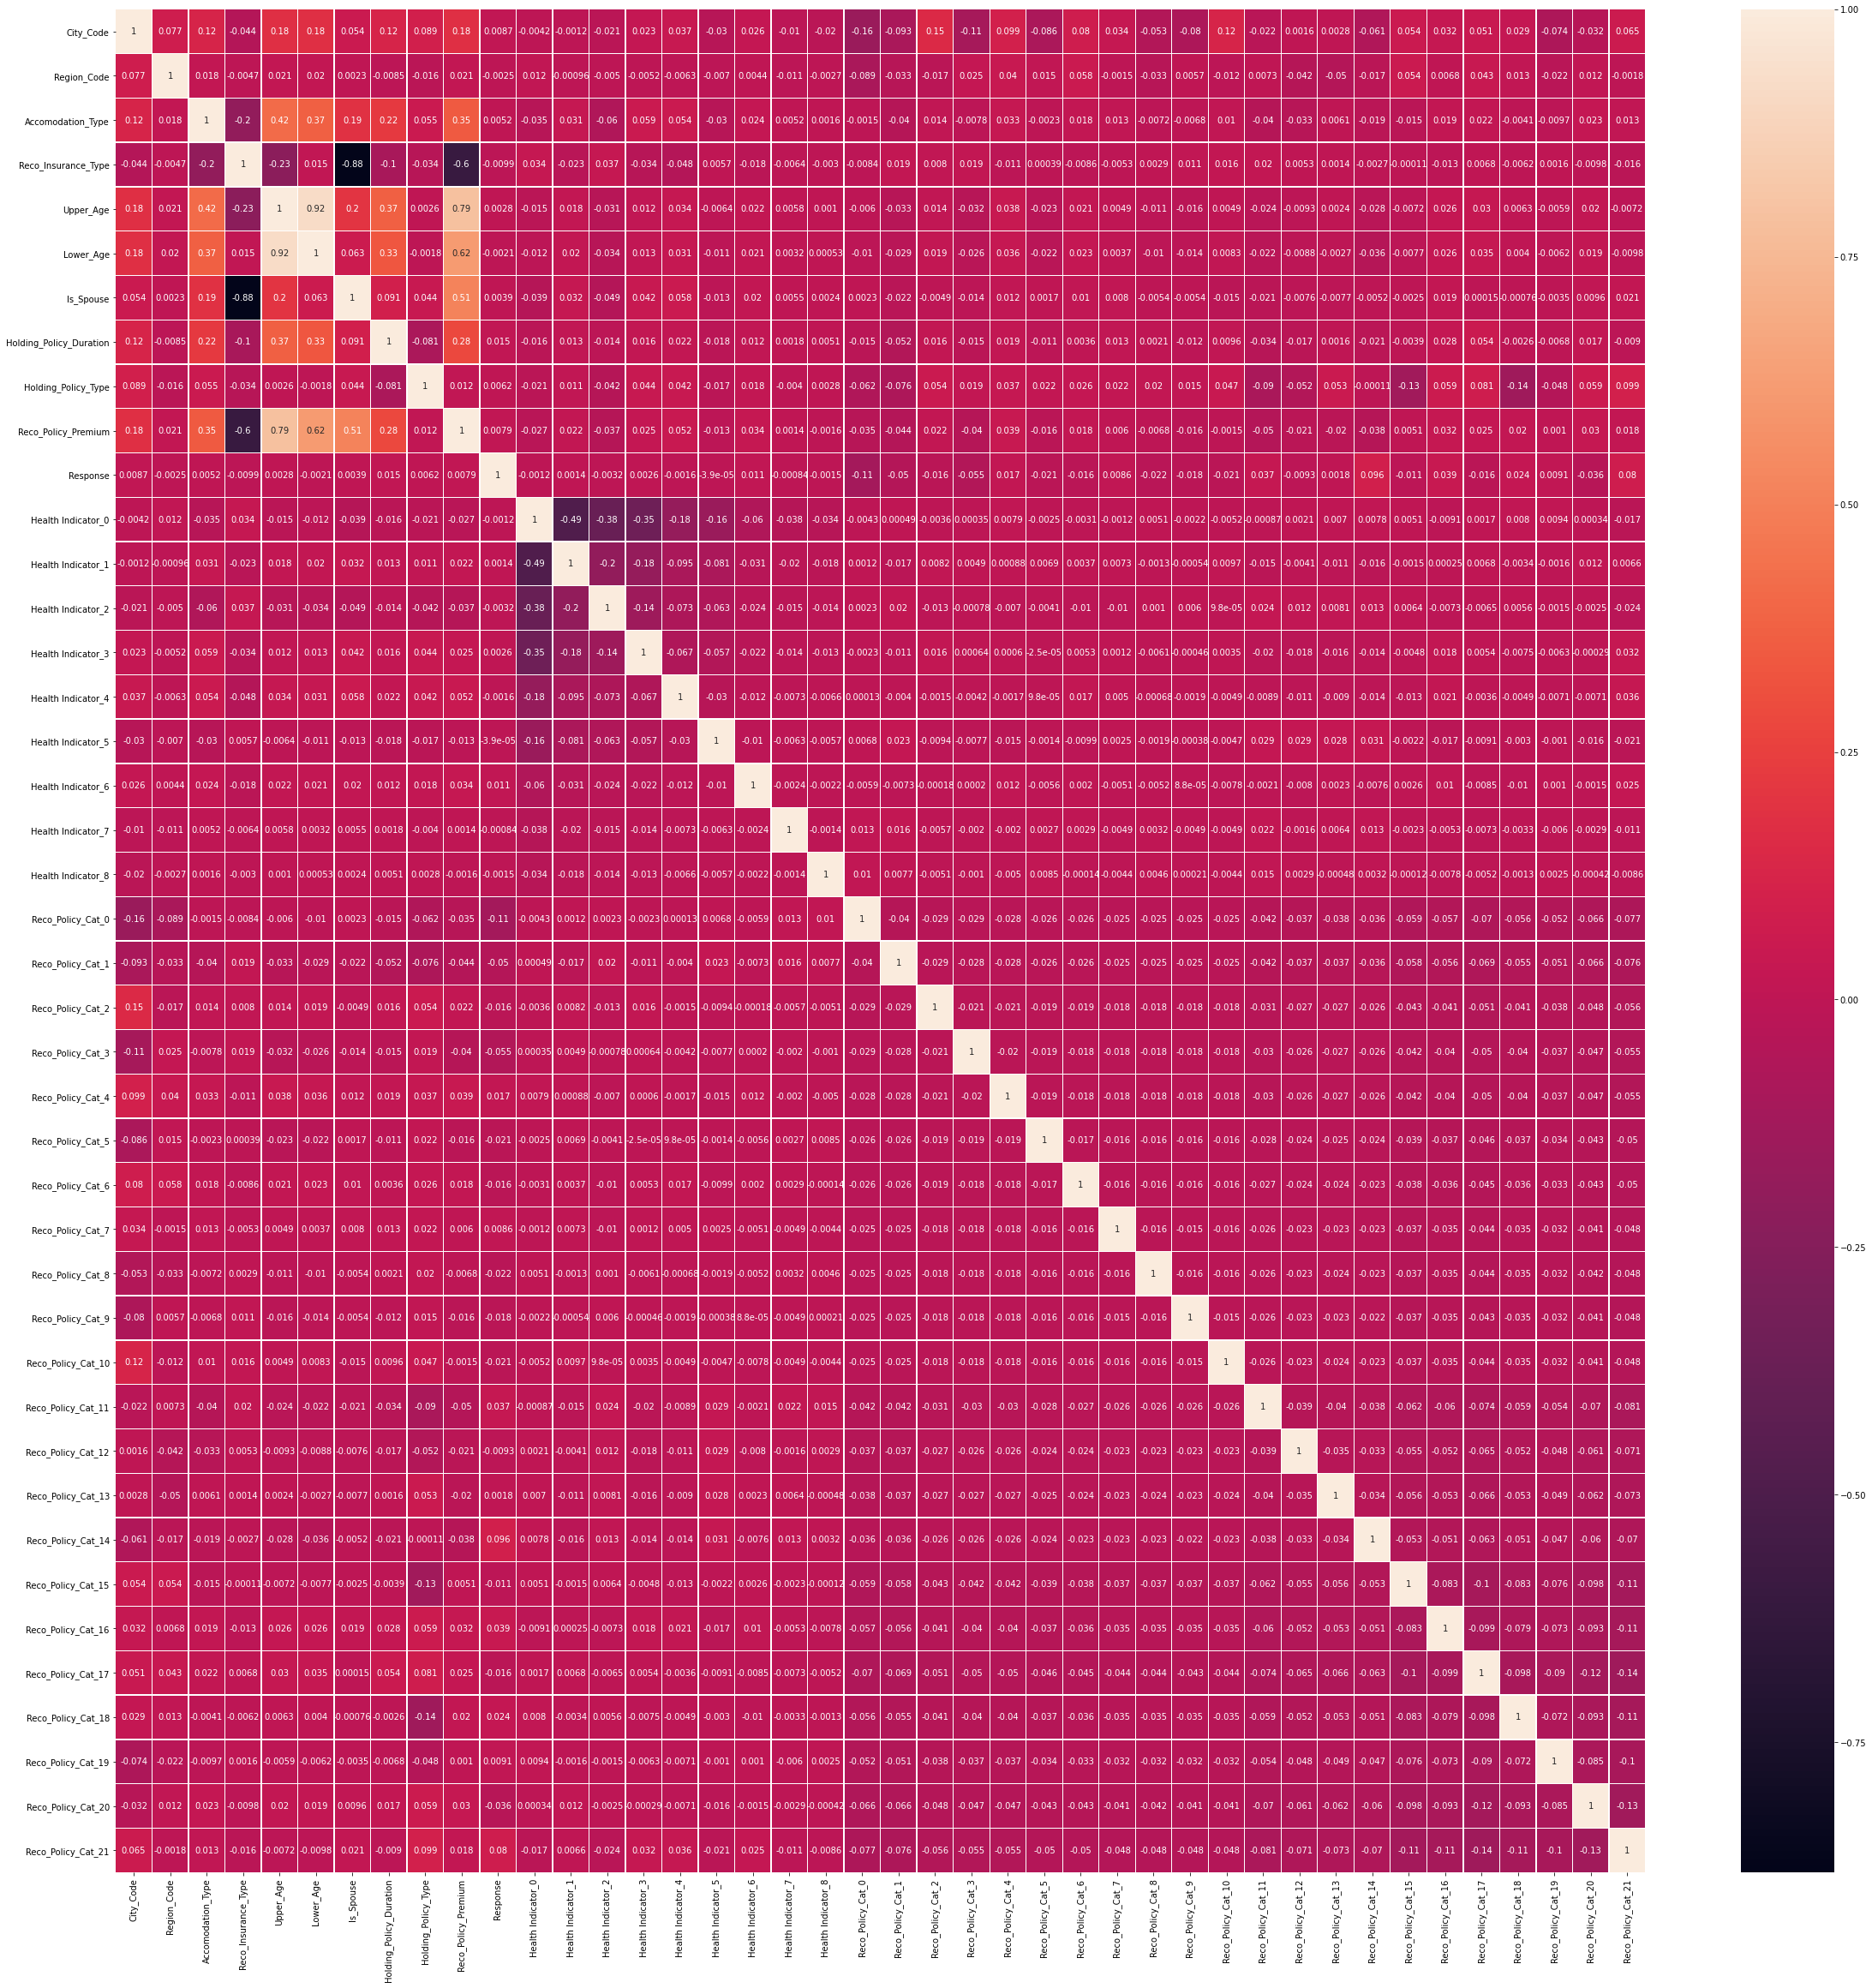

In [54]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(40,40)) 
sns.heatmap(corrd,annot=True,linewidths=0.30, ax=ax)

In [380]:
train.drop(columns=['Lower_Age'],axis=1,inplace=True)

__Test : Numerical and One-Hot Coding of Categorical variables__

In [336]:
test['City_Code'].value_counts()

0    45066
1     5816
Name: City_Code, dtype: int64

In [57]:
df_frequency_map = test.City_Code.value_counts().to_dict()

In [58]:
test.City_Code = test.City_Code.map(df_frequency_map)

In [59]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,...,Reco_Policy_Cat_12,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21
0,50883,3789,156,Owned,Individual,30,30,No,6.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,50884,1559,7,Owned,Joint,69,68,Yes,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0
2,50885,3789,564,Rented,Individual,28,28,No,2.0,4.0,...,0,0,0,0,1,0,0,0,0,0
3,50886,2065,1177,Rented,Individual,23,23,No,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0
4,50887,3789,951,Owned,Individual,75,75,No,14+,3.0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,...,Reco_Policy_Cat_12,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21
0,50883,3789,156,Owned,Individual,30,30,No,6.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,50884,1559,7,Owned,Joint,69,68,Yes,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0
2,50885,3789,564,Rented,Individual,28,28,No,2.0,4.0,...,0,0,0,0,1,0,0,0,0,0
3,50886,2065,1177,Rented,Individual,23,23,No,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0
4,50887,3789,951,Owned,Individual,75,75,No,14+,3.0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,...,Reco_Policy_Cat_12,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21
0,50883,3789,156,Owned,Individual,30,30,No,6.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,50884,1559,7,Owned,Joint,69,68,Yes,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0
2,50885,3789,564,Rented,Individual,28,28,No,2.0,4.0,...,0,0,0,0,1,0,0,0,0,0
3,50886,2065,1177,Rented,Individual,23,23,No,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0
4,50887,3789,951,Owned,Individual,75,75,No,14+,3.0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  int64  
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Holding_Policy_Duration  21805 non-null  object 
 9   Holding_Policy_Type      21805 non-null  float64
 10  Reco_Policy_Premium      21805 non-null  float64
 11  Health Indicator_0       21805 non-null  uint8  
 12  Health Indicator_1       21805 non-null  uint8  
 13  Health Indicator_2       21805 non-null  uint8  
 14  Health Indicator_3    

In [68]:
test['Accomodation_Type'].value_counts()

Owned     12090
Rented     9715
Name: Accomodation_Type, dtype: int64

In [69]:
test['Accomodation_Type'] = test['Accomodation_Type'].map({'Owned':1, 'Rented':0}).astype(int)

In [70]:
test['Reco_Insurance_Type'].value_counts()

Individual    17341
Joint          4464
Name: Reco_Insurance_Type, dtype: int64

In [71]:
test['Reco_Insurance_Type'] = test['Reco_Insurance_Type'].map({'Individual':1, 'Joint':0}).astype(int)

In [72]:
test['Is_Spouse'].value_counts()

No     18227
Yes     3578
Name: Is_Spouse, dtype: int64

In [73]:
test['Is_Spouse'] = test['Is_Spouse'].map({'Yes':1, 'No':0}).astype(int)

In [74]:
test['Holding_Policy_Duration'].value_counts()

14+     10495
1.0      1891
2.0      1772
3.0      1606
4.0      1205
5.0       992
6.0       903
7.0       664
8.0       569
9.0       493
10.0      333
11.0      254
13.0      221
14.0      211
12.0      196
Name: Holding_Policy_Duration, dtype: int64

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  int64  
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  int32  
 4   Reco_Insurance_Type      21805 non-null  int32  
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  int32  
 8   Holding_Policy_Duration  21805 non-null  object 
 9   Holding_Policy_Type      21805 non-null  float64
 10  Reco_Policy_Premium      21805 non-null  float64
 11  Health Indicator_0       21805 non-null  uint8  
 12  Health Indicator_1       21805 non-null  uint8  
 13  Health Indicator_2       21805 non-null  uint8  
 14  Health Indicator_3    

In [76]:
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].replace(['14+'],15.0)

In [77]:
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].astype(float)

In [78]:
id=test['ID']

In [79]:
test.drop(columns=['ID','Lower_Age'],axis=1,inplace=True)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  int64  
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  int32  
 3   Reco_Insurance_Type      50882 non-null  int32  
 4   Upper_Age                50882 non-null  int64  
 5   Is_Spouse                50882 non-null  int32  
 6   Holding_Policy_Duration  50882 non-null  float64
 7   Holding_Policy_Type      50882 non-null  float64
 8   Reco_Policy_Premium      50882 non-null  float64
 9   Response                 50882 non-null  int64  
 10  Health Indicator_0       50882 non-null  uint8  
 11  Health Indicator_1       50882 non-null  uint8  
 12  Health Indicator_2       50882 non-null  uint8  
 13  Health Indicator_3       50882 non-null  uint8  
 14  Health Indicator_4    

### Step 6: Building Model

In [748]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         50882 non-null  object 
 8   Holding_Policy_Duration  50882 non-null  object 
 9   Holding_Policy_Type      50882 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.0+ MB


In [749]:
# train.drop(columns='Region_Code',axis=1,inplace=True)

In [750]:
# Seperate Features and Target
X= train.drop(columns = ['Response'], axis=1)
y= train['Response']

In [751]:
target_encoder = LabelEncoder()
y_trans= target_encoder.fit_transform(y)

In [752]:
for col in X.select_dtypes('object'):
    print("Encoding :", col)
    le = LabelEncoder()
    le.fit_transform(list(X[col]))
    X[col] = le.transform(X[col])

Encoding : City_Code
Encoding : Accomodation_Type
Encoding : Reco_Insurance_Type
Encoding : Is_Spouse
Encoding : Health Indicator
Encoding : Holding_Policy_Duration


In [754]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  int32  
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  int32  
 3   Reco_Insurance_Type      50882 non-null  int32  
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  int32  
 7   Health Indicator         50882 non-null  int32  
 8   Holding_Policy_Duration  50882 non-null  int32  
 9   Holding_Policy_Type      50882 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
dtypes: float64(2), int32(6), int64(4)
memory usage: 3.5 MB


In [755]:
from sklearn.model_selection import train_test_split

X_train_orig, X_valid_orig, y_train, y_valid = train_test_split(X, y_trans, random_state = 0)

### 3- Scaling

In [756]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_valid = scaler.transform(X_valid_orig)

# Logisitic Regression:

In [93]:
param_grid_log ={'C':[0.01, 0.1, 1, 10, 100],
                'penalty':['l1','l2'],
                'solver':['lbfgs','liblinear'],
                'class_weight': [{0: x, 1: 1.0-x} for x in weights]}
print(" Parameter grid for logistic regression is: {}".format(param_grid_log))

 Parameter grid for logistic regression is: {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'liblinear'], 'class_weight': [{0: 0.05, 1: 0.95}, {0: 0.09736842105263158, 1: 0.9026315789473685}, {0: 0.14473684210526316, 1: 0.8552631578947368}, {0: 0.19210526315789472, 1: 0.8078947368421052}, {0: 0.23947368421052628, 1: 0.7605263157894737}, {0: 0.28684210526315784, 1: 0.7131578947368422}, {0: 0.33421052631578946, 1: 0.6657894736842105}, {0: 0.381578947368421, 1: 0.618421052631579}, {0: 0.4289473684210526, 1: 0.5710526315789475}, {0: 0.47631578947368414, 1: 0.5236842105263159}, {0: 0.5236842105263158, 1: 0.47631578947368425}, {0: 0.5710526315789474, 1: 0.42894736842105263}, {0: 0.618421052631579, 1: 0.381578947368421}, {0: 0.6657894736842105, 1: 0.3342105263157895}, {0: 0.7131578947368421, 1: 0.2868421052631579}, {0: 0.7605263157894736, 1: 0.2394736842105264}, {0: 0.8078947368421052, 1: 0.19210526315789478}, {0: 0.8552631578947368, 1: 0.14473684210526316}, {0: 0.

In [94]:
grid_search_log=GridSearchCV(LogisticRegression(),param_grid_log,return_train_score=True,n_jobs=-1)

In [95]:
grid_search_log.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [{0: 0.05, 1: 0.95},
                                          {0: 0.09736842105263158,
                                           1: 0.9026315789473685},
                                          {0: 0.14473684210526316,
                                           1: 0.8552631578947368},
                                          {0: 0.19210526315789472,
                                           1: 0.8078947368421052},
                                          {0: 0.23947368421052628,
                                           1: 0.7605263157894737},
                                          {0: 0.28684210526315784,
                                           1: 0.7131578947368422},
                                          {0:...
                                           1: 0.3342105263157895},
                                         

In [96]:
print("Best parameters: {}".format(grid_search_log.best_params_))

Best parameters: {'C': 0.1, 'class_weight': {0: 0.5236842105263158, 1: 0.47631578947368425}, 'penalty': 'l2', 'solver': 'lbfgs'}


In [97]:
log = LogisticRegression(C=0.1, penalty='l2',class_weight={0: 0.5236842105263158, 1: 0.47631578947368425}, solver='lbfgs')
log.fit(X_train, y_train)
ypred = log.predict(X_valid)
p = roc_auc_score(ypred,y_valid)
print(p)

0.5442810714472925


In [98]:
MSE= metrics.mean_squared_error(y_valid,ypred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.49484410299285464


In [972]:
predictions=log.predict(test)

In [973]:
predictions

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [1071]:
pred=pd.DataFrame(predictions,columns=['Response'])

In [1077]:
pred.head(10)

,Response
0,0
1,1
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,0


In [1072]:
dfid=pd.DataFrame(id,columns=['ID'])

In [1073]:
final=pd.concat([dfid.reset_index(drop=True),pred.reset_index(drop=True)],axis=1)

In [1074]:
final

,ID,Response
0,50883,0
1,50884,1
2,50885,0
3,50886,0
4,50887,0
...,...,...
21800,72683,0
21801,72684,1
21802,72685,1
21803,72686,1


# KNN Classification:

In [746]:
## Grid Search with Cross- Validation
max_class = np.max(np.bincount(y))
param_grid_knn={'n_neighbors': range(1, 10)}
print(" Parameter grid for KNN is: {}".format(param_grid_knn))

 Parameter grid for KNN is: {'n_neighbors': range(1, 10)}


In [747]:
grid_search_knn=GridSearchCV(KNeighborsClassifier(),param_grid_knn,scoring='roc_auc',n_jobs=-1)

In [748]:
grid_search_knn.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
print("Best parameters: {}".format(grid_search_knn.best_params_))

In [324]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
ypred = knn.predict(X_valid)
p = roc_auc_score(ypred,y_valid)
print(p)

0.5197020584813069


## Decision Tree Classifier

In [757]:
weights = np.linspace(0.05, 0.95, 20)
param_grid_dtc={'class_weight': [{0: x, 1: 1.0-x} for x in weights],'criterion':['gini','entropy'],
               'max_depth':[10,50,100,200]}

In [758]:
grid_search_dtc=GridSearchCV(DecisionTreeClassifier(),param_grid_dtc,scoring='roc_auc',n_jobs=-1)

In [759]:
grid_search_dtc.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.05, 1: 0.95},
                                          {0: 0.09736842105263158,
                                           1: 0.9026315789473685},
                                          {0: 0.14473684210526316,
                                           1: 0.8552631578947368},
                                          {0: 0.19210526315789472,
                                           1: 0.8078947368421052},
                                          {0: 0.23947368421052628,
                                           1: 0.7605263157894737},
                                          {0: 0.28684210526315784,
                                           1: 0.7131578947368422},
                                          {0: 0.33421052631578946,...
                                           1: 0.3342105263157895},
                                          {0: 0.7131578947368421,
     

In [760]:
print("Best parameters: {}".format(grid_search_dtc.best_params_))

Best parameters: {'class_weight': {0: 0.9026315789473683, 1: 0.09736842105263166}, 'criterion': 'gini', 'max_depth': 10}


In [761]:
dtr = DecisionTreeClassifier(criterion='gini',class_weight={0: 0.9026315789473683, 1: 0.09736842105263166},max_depth=10)
dtr.fit(X_train, y_train)
ypred = dtr.predict(X_valid)
p = roc_auc_score(ypred,y_valid)
print(p)

0.5494406196213425


In [762]:
MSE= metrics.mean_squared_error(y_valid,ypred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.4973793439376064


# Linear Support Vector Machine:

In [93]:
param_grid_lsvc ={'C':[0.01, 0.1, 1, 10, 100],
                 'class_weight': [{0: x, 1: 1.0-x} for x in weights]}
print(" Parameter grid for linear SVC is: {}".format(param_grid_lsvc))

 Parameter grid for linear SVC is: {'C': [0.01, 0.1, 1, 10, 100], 'class_weight': [{0: 0.05, 1: 0.95}, {0: 0.09736842105263158, 1: 0.9026315789473685}, {0: 0.14473684210526316, 1: 0.8552631578947368}, {0: 0.19210526315789472, 1: 0.8078947368421052}, {0: 0.23947368421052628, 1: 0.7605263157894737}, {0: 0.28684210526315784, 1: 0.7131578947368422}, {0: 0.33421052631578946, 1: 0.6657894736842105}, {0: 0.381578947368421, 1: 0.618421052631579}, {0: 0.4289473684210526, 1: 0.5710526315789475}, {0: 0.47631578947368414, 1: 0.5236842105263159}, {0: 0.5236842105263158, 1: 0.47631578947368425}, {0: 0.5710526315789474, 1: 0.42894736842105263}, {0: 0.618421052631579, 1: 0.381578947368421}, {0: 0.6657894736842105, 1: 0.3342105263157895}, {0: 0.7131578947368421, 1: 0.2868421052631579}, {0: 0.7605263157894736, 1: 0.2394736842105264}, {0: 0.8078947368421052, 1: 0.19210526315789478}, {0: 0.8552631578947368, 1: 0.14473684210526316}, {0: 0.9026315789473683, 1: 0.09736842105263166}, {0: 0.95, 1: 0.0500000000

In [119]:
grid_search_lsvc=GridSearchCV(LinearSVC(max_iter=1000),param_grid_lsvc,return_train_score=True,n_jobs=-1)

In [120]:
grid_search_lsvc.fit(X_train,y_train)

GridSearchCV(estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [{0: 0.05, 1: 0.95},
                                          {0: 0.09736842105263158,
                                           1: 0.9026315789473685},
                                          {0: 0.14473684210526316,
                                           1: 0.8552631578947368},
                                          {0: 0.19210526315789472,
                                           1: 0.8078947368421052},
                                          {0: 0.23947368421052628,
                                           1: 0.7605263157894737},
                                          {0: 0.28684210526315784,
                                           1: 0.7131578947368422},
                                          {0: 0.3342105...
                                          {0: 0.618421052631579,
                                          

In [121]:
print("Best parameters: {}".format(grid_search_lsvc.best_params_))

Best parameters: {'C': 0.01, 'class_weight': {0: 0.5236842105263158, 1: 0.47631578947368425}}


In [123]:
lsv = LinearSVC(C=0.01,class_weight={0: 0.5236842105263158, 1: 0.47631578947368425})
lsv.fit(X_train, y_train)
ypred = lsv.predict(X_valid)
# p = roc_auc_score(ypred,y_valid)
# print(p)

In [124]:
MSE= metrics.mean_squared_error(y_valid,ypred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.49476466738707875


# Bagging

In [86]:
dt_clf = DecisionTreeClassifier(criterion='gini',class_weight={0: 0.05, 1: 0.95},max_depth=10)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=0.5, max_features=0.3, 
                            bootstrap=True,n_jobs=-1, random_state=0, oob_score = True)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.05,
                                                                      1: 0.95},
                                                        max_depth=10),
                  max_features=0.3, max_samples=0.5, n_estimators=500,
                  n_jobs=-1, oob_score=True, random_state=0)

In [87]:
ypred = bag_clf.predict(X_valid)
MSE= metrics.mean_squared_error(y_valid,ypred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.8690269983753977


In [99]:
lgr = LogisticRegression(C=0.1, penalty='l2',class_weight={0: 0.5236842105263158, 1: 0.47631578947368425}, solver='lbfgs')
bag_lgr = BaggingClassifier(lgr, n_estimators=500, max_samples=0.5, bootstrap=True,n_jobs=-1, random_state=0, oob_score = True)

bag_lgr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.1,
                                                    class_weight={0: 0.5236842105263158,
                                                                  1: 0.47631578947368425}),
                  max_samples=0.5, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=0)

In [100]:
ypred = bag_lgr.predict(X_valid)
# p = roc_auc_score(ypred,y_valid)
# print(p)

In [101]:
MSE= metrics.mean_squared_error(y_valid,ypred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.49484410299285464


In [92]:
predictions=bag_lgr.predict(test)

In [93]:
predictions

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [94]:
pred=pd.DataFrame(predictions,columns=['Response'])

In [95]:
pred.head(10)

,Response
0,0
1,1
2,0
3,1
4,1
5,0
6,1
7,1
8,1
9,1


In [96]:
dfid=pd.DataFrame(id,columns=['ID'])

In [97]:
final=pd.concat([dfid.reset_index(drop=True),pred.reset_index(drop=True)],axis=1)

In [98]:
final

,ID,Response
0,50883,0
1,50884,1
2,50885,0
3,50886,1
4,50887,1
...,...,...
21800,72683,1
21801,72684,1
21802,72685,1
21803,72686,1


# Pasting

In [125]:
lgr = LogisticRegression(C=0.01, penalty='l2',class_weight={0: 0.5236842105263158, 1: 0.47631578947368425}, solver='liblinear')
bag_lgr = BaggingClassifier(lgr, n_estimators=500, max_samples=0.5, bootstrap=False,n_jobs=-1, random_state=0)

bag_lgr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.01,
                                                    class_weight={0: 0.5236842105263158,
                                                                  1: 0.47631578947368425},
                                                    solver='liblinear'),
                  bootstrap=False, max_samples=0.5, n_estimators=500, n_jobs=-1,
                  random_state=0)

In [128]:
ypred = bag_lgr.predict(X_valid)
MSE= metrics.mean_squared_error(y_valid,ypred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.49476466738707875


In [363]:
knn=KNeighborsClassifier(n_neighbors= 8)
bag_knn = BaggingClassifier(knn, n_estimators=500, max_samples=0.5, bootstrap=False,n_jobs=-1, random_state=0)

bag_knn.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=8),
                  bootstrap=False, max_samples=0.5, n_estimators=500, n_jobs=-1,
                  random_state=0)

In [ ]:
ypred = bag_knn.predict(X_valid)
p = roc_auc_score(ypred,y_valid)
print(p)

# AdaBoost Boosting

In [129]:
ada_dtc = AdaBoostClassifier(LogisticRegression(C=0.01, penalty='l2',class_weight={0: 0.5236842105263158, 1: 0.47631578947368425}, solver='liblinear'), n_estimators=50, 
                             algorithm="SAMME.R", learning_rate=0.5, random_state=0)

ada_dtc.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(C=0.01,
                                                     class_weight={0: 0.5236842105263158,
                                                                   1: 0.47631578947368425},
                                                     solver='liblinear'),
                   learning_rate=0.5, random_state=0)

In [135]:
ypred = ada_dtc.predict(X_valid)
MSE= metrics.mean_squared_error(y_valid,ypred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.49476466738707875


In [132]:
ada_lgr = AdaBoostClassifier(LogisticRegression(C=0.01, penalty='l2',class_weight={0: 0.5236842105263158, 1: 0.47631578947368425}, solver='liblinear'), n_estimators=500, 
                             algorithm="SAMME.R", learning_rate=0.5, random_state=0)

ada_lgr.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(C=0.01,
                                                     class_weight={0: 0.5236842105263158,
                                                                   1: 0.47631578947368425},
                                                     solver='liblinear'),
                   learning_rate=0.5, n_estimators=500, random_state=0)

In [133]:
ypred = ada_lgr.predict(X_valid)
MSE= metrics.mean_squared_error(y_valid,ypred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.49476466738707875


# Gradient Boosting with GridSearchCV:

In [134]:
param_grid={'learning_rate':[0.1,0.5,0.7,1.0],'n_estimators':[50,100,300]}
grid_search_bgc=GridSearchCV(GradientBoostingClassifier(max_depth=3, random_state=0),param_grid,return_train_score=True,n_jobs=-1)
grid_search_bgc.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.7, 1.0],
                         'n_estimators': [50, 100, 300]},
             return_train_score=True)

In [136]:
ypred = grid_search_bgc.predict(X_valid)
MSE= metrics.mean_squared_error(y_valid,ypred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.494923525849155


# PCA

In [102]:
pca = PCA(n_components = 0.95)
X_train_r = pca.fit_transform(X_train)
X_valid_r = pca.transform(X_valid)

In [103]:
pca.explained_variance_ratio_.sum()

0.9619825709789039

In [104]:
np.shape(X_train_r)

(38161, 34)

### Bagging with PCA

In [105]:
lgr = LogisticRegression(C=0.01, penalty='l2',class_weight={0: 0.5236842105263158, 1: 0.47631578947368425}, solver='liblinear')
bag_lgr = BaggingClassifier(lgr, n_estimators=500, max_samples=0.5, bootstrap=True,n_jobs=-1, random_state=0, oob_score = True)

bag_lgr.fit(X_train_r, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.01,
                                                    class_weight={0: 0.5236842105263158,
                                                                  1: 0.47631578947368425},
                                                    solver='liblinear'),
                  max_samples=0.5, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=0)

In [106]:
ypred = bag_lgr.predict(X_valid_r)
# p = roc_auc_score(ypred,y_valid)
# print(p)

In [107]:
MSE= metrics.mean_squared_error(y_valid,ypred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.494923525849155


In [103]:
p = roc_auc_score(ypred,y_valid)
print(p)

0.6776737967914439


In [106]:
X_test_r = pca.transform(test)

In [108]:
predictions=bag_lgr.predict(X_test_r)

In [109]:
predictions

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [110]:
pred=pd.DataFrame(predictions,columns=['Response'])

In [111]:
pred.head(10)

,Response
0,1
1,0
2,1
3,1
4,0
5,1
6,1
7,0
8,0
9,0


In [112]:
dfid=pd.DataFrame(id,columns=['ID'])

In [113]:
final=pd.concat([dfid.reset_index(drop=True),pred.reset_index(drop=True)],axis=1)

In [114]:
final

,ID,Response
0,50883,1
1,50884,0
2,50885,1
3,50886,1
4,50887,0
...,...,...
21800,72683,0
21801,72684,0
21802,72685,0
21803,72686,0


In [132]:
final.to_csv('E:\\Hackathon\\JOB-A-ThON\\jobathonpred.csv',index=False)

### Gradient Boosting PCA

In [108]:
param_grid={'learning_rate':[0.1,0.5,0.7,1.0],'n_estimators':[50,100,300]}
grid_search_bgc=GridSearchCV(GradientBoostingClassifier(max_depth=3, random_state=0),param_grid,return_train_score=True,n_jobs=-1)
grid_search_bgc.fit(X_train_r, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.7, 1.0],
                         'n_estimators': [50, 100, 300]},
             return_train_score=True)

In [109]:
ypred = grid_search_bgc.predict(X_valid_r)
MSE= metrics.mean_squared_error(y_valid,ypred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.49468521902568546


### Adaboost Boosting PCA

In [122]:
ada_dtc = AdaBoostClassifier(LogisticRegression(C=0.01, penalty='l2',class_weight={0: 0.5236842105263158, 1: 0.47631578947368425}, solver='liblinear'), n_estimators=50, 
                             algorithm="SAMME.R", learning_rate=0.5, random_state=0)

ada_dtc.fit(X_train_r, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(C=0.01,
                                                     class_weight={0: 0.5236842105263158,
                                                                   1: 0.47631578947368425},
                                                     solver='liblinear'),
                   learning_rate=0.5, random_state=0)

In [152]:
ypred = ada_dtc.predict(X_valid_r)
MSE= metrics.mean_squared_error(y_valid,ypred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)
print(MSE)

Root Mean Squared Error: 0.49484410299285464
0.24487068626680292


In [124]:
p = roc_auc_score(ypred,y_valid)
print(p)

0.5776344762503932


In [125]:
predictions=ada_dtc.predict(X_test_r)

In [126]:
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [127]:
pred=pd.DataFrame(predictions,columns=['Response'])

In [128]:
pred.head(10)

,Response
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [129]:
dfid=pd.DataFrame(id,columns=['ID'])

In [130]:
final=pd.concat([dfid.reset_index(drop=True),pred.reset_index(drop=True)],axis=1)

In [131]:
final

,ID,Response
0,50883,1
1,50884,1
2,50885,1
3,50886,1
4,50887,1
...,...,...
21800,72683,1
21801,72684,1
21802,72685,1
21803,72686,1


In [768]:
xgb_train_data = xgb.DMatrix(X_train, label=y_train)
xgb_valid_data = xgb.DMatrix(X_valid, label=y_valid)

In [772]:
obj_call_count = 0
cur_best_score = -np.inf
NB_CV_FOLDS = 3
NUM_OF_BOOST_ROUND = 10000
EARLY_STOPPING = 300
OOF_PREDICTION = True
NUM_OF_SPLITS = 5 # Used for OOF Prediction 
TRAIN_ON_FULL_DATA = True
hyperopt_params = []
MAX_EVALS = 10
FIND_BEST_HYPERPARAMETERS = False
TARGET_ENCODING = False

In [773]:
xgb_current_best = (0.5992587341153869, {'booster': 'gbtree', 'colsample_bytree': 0.65, 'eta': 0.45, 'eval_metric': 'mlogloss', 'gamma': 0.75, 'max_depth': 5, 'min_child_weight': 4.0, 'num_class': 7, 'objective': 'multi:softprob', 'reg_alpha': 0.1, 'reg_lambda': 1.9000000000000001, 'seed': 2021, 'silent': 1, 'subsample': 0.9500000000000001, 'tree_method': 'hist'}, 30)
xgb_params = xgb_current_best[1].copy()
xgb_bst = xgb.train(xgb_params, xgb_train_data, NUM_OF_BOOST_ROUND, 
                evals=[(xgb_train_data, 'train'), (xgb_valid_data, 'eval')], 
                early_stopping_rounds= EARLY_STOPPING, 
                verbose_eval=100)

[01:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mlogloss:1.18947	eval-mlogloss:1.19651
[100]	train-mlogloss:0.44433	eval-mlogloss:0.52659
[200]	train-mlogloss:0.40242	eval-mlogloss:0.53418
[300]	train-mlogloss:0.37392	eval-mlogloss:0.54297
[372]	train-mlogloss:0.35723	eval-mlogloss:0.54791


In [775]:
xgb_ypred_valid = xgb_bst.predict(xgb_valid_data, ntree_limit=xgb_bst.best_ntree_limit)
roc_auc_score(y_valid, np.argmax(xgb_ypred_valid, axis=1))

0.5182523695023011